# SI 618 - Homework #3: Visualization and Time Series

### Dr. Chris Teplovs, School of Information, University of Michigan
<small><a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a>This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.

Version 2023.01.24.3.CT

Replace the `?` in the following cell with your uniqname:

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
MY_UNIQNAME = '?'

## Background

We are going to return to the environmental sensor data that we experimented with earlier in this course.

Your main task in this assignment is to explore the data *using the data manipulation methods* and *visualization techniques* we covered in class as well as those in the assigned readings. **There is additional material for you to learn in this homework,
which is included after the questions that comprise the homework assignment.**

You may need to consult pandas documentation, Stack Overflow, or other online resources.  


A total of 100 points is available in this homework assignment, consisting of:
- 80 points for completing the specific homework questions. More comprehensive 
answers will tend to gain more points.
- 10 points for the overall quality of spelling, grammar, punctuation, and style of written responses.  (see https://faculty.washington.edu/heagerty/Courses/b572/public/StrunkWhite.pdf for a detailed specifications).
- 10 points for creating code that conforms to [PEP 8](https://www.python.org/dev/peps/pep-0008/) guidelines.  You should review those guidelines before proceding with the assignment.


## 0. Download the data from: 
Load the data from https://raw.githubusercontent.com/umsi-data-science/data/main/Aranet4_WN23.csv into a DataFrame.

In [ ]:
pd.read_csv

## 1. Answer the questions below. 
For each question, you should
1. Write code using Python and pandas that can help you answer the following questions, and
2. Explain your answers in plain English. You should use complete sentences that would be understood by an educated professional who is not necessarily a data scientist (like a product manager).

### Q1 (20 points): Create a scatterplot that shows the relationship between relative humidity (as the dependent or y-axis variable) and temperature (as the independent or x-axis variable).
Be sure to label the axes and provide a title for your chart.
Is there anything interesting to report based on your visualization?

In [83]:
# put your code here

(and explain your interesting findings)

### Q2 (20 points): Create a box plot of Atmospheric Pressure.
Use annotation to indicate the median, maximum, and minimum values. (note: you might want to use something like .describe() to get the actual values).

In [84]:
# put your code here

(Use this space to explain your answers)

### Q3 (20 points): Create a line chart of the maximum hourly temperature for January 11, 2023. 


In [129]:
# put your code here

(Use this space to explain your answers)

### Q4 (20 points): Create a line chart for the values of carbon dioxide for January 11, 2023.  

When coloring your markers and/or lines, use green for values less than 1000, orange for values between 1000 and 1400, and red for values greater than 1400.

In [86]:
# put your code here

(Use this space to explain your answers)

## New Material: working with dates, times, and time series in pandas

The pandas package was initially created by Wes McKinney, who is an econometrician.
Perhaps unsurprisingly, there is a lot of econometric functionality embedded within pandas.
Here we introduce the pandas datetime data type, as well as the concept of downsampling.

You should refer to the Python for Data Analysis book chapters on Time Series for additional background information.  You will need this information to complete the homework assignment.

First, let's start with some basic python datetime functionality:

We can get a datetime object for right now:

In [4]:
datetime.now()

datetime.datetime(2023, 1, 25, 15, 47, 41, 441817)

We can also create a datetime object for any arbitrary date:

In [5]:
datetime(2022, 1, 27)

datetime.datetime(2022, 1, 27, 0, 0)

We can also set hours, minutes and seconds (and more):

In [6]:
datetime(2022, 1, 27, 11, 45, 0)

datetime.datetime(2022, 1, 27, 11, 45)

datetime objects can be manipulated to create timedeltas:

In [7]:
datetime.now() - datetime(2022, 1, 1)

datetime.timedelta(days=389, seconds=56889, microseconds=544663)

That's enough of plain old python's datetime stuff.  Let's move onto pandas.
Pandas has a Timestamp object that's very similar to what we just saw:

In [8]:
ts = pd.Timestamp(datetime(2022, 1, 27))

In [9]:
ts

Timestamp('2022-01-27 00:00:00')

We can do interesting things like represent the timezone:

In [10]:
ts = pd.Timestamp(datetime(2022, 1, 27), tz="US/Eastern")

In [11]:
ts

Timestamp('2022-01-27 00:00:00-0500', tz='US/Eastern')

There are handy utility attributes and methods to extract useful information:

In [12]:
ts.day_name()

'Thursday'

In [98]:
pd.Timestamp.now()

Timestamp('2023-01-24 10:58:07.777593')

Let's load some demo data:

In [13]:
from io import StringIO

TIME_SERIES_DEMO=StringIO("""Sequence,Time,Carbon dioxide(ppm),Temperature(°C),Relative humidity(%),Atmospheric pressure(hPa)
0,1/18/2022 9:46:13 PM,1656,15.0,52,990
1,1/18/2022 9:47:13 PM,1656,15.0,52,990
2,1/18/2022 9:48:13 PM,1656,15.0,52,990
3,1/18/2022 9:49:13 PM,1010,17.9,40,990
4,1/18/2022 9:50:13 PM,956,18.3,39,990
5,1/19/2022 12:01:14 PM, 950, 20.0, 40, 990""")
time_series_demo=pd.read_csv(TIME_SERIES_DEMO,index_col="Sequence")


What is the data type of the "Time" column?

In [15]:
time_series_demo.Time.dtype

dtype('O')

Let's convert the `Time` Series to datetime:

In [16]:
time_series_demo.Time = pd.to_datetime(time_series_demo.Time)

In [17]:
time_series_demo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Time                       6 non-null      datetime64[ns]
 1   Carbon dioxide(ppm)        6 non-null      int64         
 2   Temperature(°C)            6 non-null      float64       
 3   Relative humidity(%)       6 non-null      int64         
 4   Atmospheric pressure(hPa)  6 non-null      int64         
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 288.0 bytes


Now let's set the index to be the Time column.  Note that we're using `inplace=True` to modify the DataFrame in place (instead of returning a new DataFrame):

In [18]:
time_series_demo.set_index('Time', inplace=True)

In [19]:
time_series_demo.head()

,Carbon dioxide(ppm),Temperature(°C),Relative humidity(%),Atmospheric pressure(hPa)
Time,,,,
2022-01-18 21:46:13,1656,15.0,52,990
2022-01-18 21:47:13,1656,15.0,52,990
2022-01-18 21:48:13,1656,15.0,52,990
2022-01-18 21:49:13,1010,17.9,40,990
2022-01-18 21:50:13,956,18.3,39,990


Create a new dataframe that contains only the measurements for January 18, 2022:

In [20]:
jan18 = time_series_demo.loc['2022-01-18', :]

In [21]:
jan18.head()

,Carbon dioxide(ppm),Temperature(°C),Relative humidity(%),Atmospheric pressure(hPa)
Time,,,,
2022-01-18 21:46:13,1656,15.0,52,990
2022-01-18 21:47:13,1656,15.0,52,990
2022-01-18 21:48:13,1656,15.0,52,990
2022-01-18 21:49:13,1010,17.9,40,990
2022-01-18 21:50:13,956,18.3,39,990


In [22]:
jan18.max()

Carbon dioxide(ppm)          1656.0
Temperature(°C)                18.3
Relative humidity(%)           52.0
Atmospheric pressure(hPa)     990.0
dtype: float64

In [23]:
jan18.describe()

,Carbon dioxide(ppm),Temperature(°C),Relative humidity(%),Atmospheric pressure(hPa)
count,5.000000,5.000000,5.000000,5.0
mean,1386.800000,16.240000,47.000000,990.0
std,369.111365,1.703819,6.855655,0.0
min,956.000000,15.000000,39.000000,990.0
25%,1010.000000,15.000000,40.000000,990.0
50%,1656.000000,15.000000,52.000000,990.0
75%,1656.000000,17.900000,52.000000,990.0
max,1656.000000,18.300000,52.000000,990.0


Let's create four plots, one for each of the numeric series in our DataFrame:

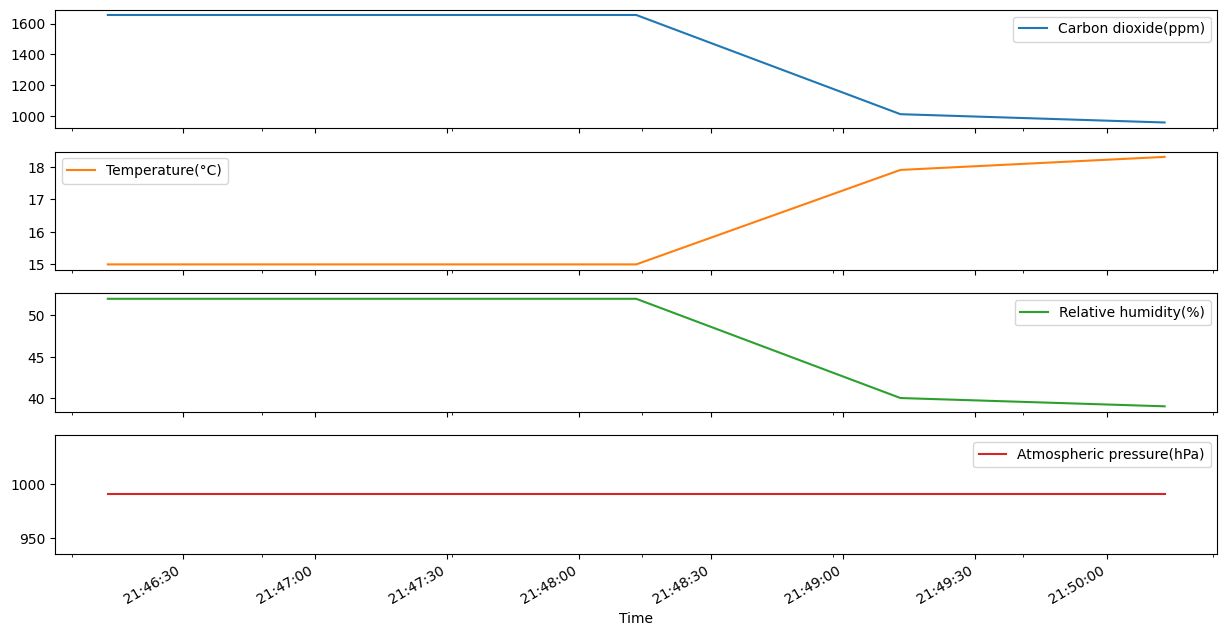

In [24]:
jan18.plot(subplots=True, figsize=(15, 8))
plt.show()

And let's create a bar chart showing the maximum hourly CO<sub>2</sub> concentrations:

<AxesSubplot: xlabel='Time'>

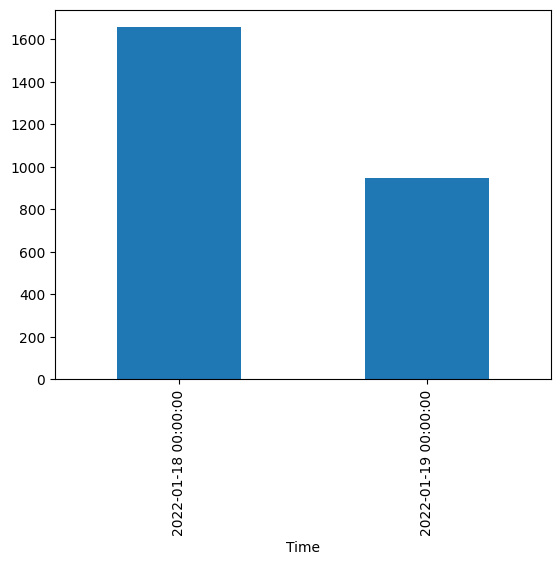

In [128]:
time_series_demo["Carbon dioxide(ppm)"].resample("1d").max().plot(kind='bar')

## Please submit your completed notebook in .IPYNB and .HTML formats via Canvas